## Homework_2023_03_20 Pandas 二   
教师：胡俊峰

助教：谷东润 陈福康

本次作业总分为13分，达到10分即为满分，另外3分是附加分

如对本次作业有任何疑问，请在课程大群、技术问题交流群中提出或联系负责助教。


## 第零部分：请认真阅读代码，理解代码的功能

In [1]:
import pandas as pd
import numpy as np


raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

In [2]:
all_data = pd.concat([data1, data2])
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [3]:
all_data_col = pd.concat([data1, data2], axis = 1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [4]:
pd.merge(all_data, data3, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [5]:
pd.merge(data1, data2, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [6]:
pd.merge(data1, data2, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


## 第一部分：基础练习

#### 1.1 pandas基础操作（2分）

按要求完成pandas的基础操作，注意：**给出的输出仅作格式参考，由于存在随机生成的数据，所以你的答案与给出的输出可能不一致**

In [7]:
import pandas as pd
import numpy as np

arrays = [['day', 'day', 'day', 'night', 'night', 'night', 'night', 'night'],
          ['summer', 'winter', 'winter', 'summer', 'summer', 'summer', 'winter', 'winter'],
          ['swim', 'swim', 'soccer', 'swim', 'soccer', 'sleep', 'swim', 'soccer']]

tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['Time', 'Season', 'Sport'])
df1 = pd.DataFrame(np.random.uniform(0, 1, (8, 2)), index=index, columns=['Alice', 'Bob'])

index2 = pd.MultiIndex.from_tuples([('day', 'summer'), ('day', 'winter'), ('night', 'summer'), ('night', 'winter')],
                                   names=['Time', 'Season'])

df2 = pd.DataFrame(list(zip(*[['Awesome', 'Good', 'Fine', 'Bad'], [1, 0.8, 0.6, 0.5]])), index=index2, columns=['Mood', 'Prob'])

# 不同季节不同时间Alice和Bob去做这些运动的概率
print(df1)
# 不同季节不同时间Alice和Bob的心情，以及该心情对运动概率的影响
print(df2)

                        Alice       Bob
Time  Season Sport                     
day   summer swim    0.711152  0.528694
      winter swim    0.935585  0.341898
             soccer  0.416797  0.779667
night summer swim    0.144930  0.165451
             soccer  0.840976  0.066422
             sleep   0.966625  0.421262
      winter swim    0.885575  0.501774
             soccer  0.898099  0.875215
                 Mood  Prob
Time  Season               
day   summer  Awesome   1.0
      winter     Good   0.8
night summer     Fine   0.6
      winter      Bad   0.5


使用merge得到与给定输出格式一致的DataFrame（1分）

In [8]:
# TODO
merge_df = pd.merge(df1, df2, right_index=True, left_on=['Time', 'Season'])
print(merge_df)

                        Alice       Bob     Mood  Prob
Time  Season Sport                                    
day   summer swim    0.711152  0.528694  Awesome   1.0
      winter swim    0.935585  0.341898     Good   0.8
             soccer  0.416797  0.779667     Good   0.8
night summer swim    0.144930  0.165451     Fine   0.6
             soccer  0.840976  0.066422     Fine   0.6
             sleep   0.966625  0.421262     Fine   0.6
      winter swim    0.885575  0.501774      Bad   0.5
             soccer  0.898099  0.875215      Bad   0.5


计算考虑心情之后的运动概率，直接用原概率乘以Prob的值，并用新得到的值替换掉原概率。（1分）

In [9]:
#TODO
merge_df.Alice *= merge_df.Prob
merge_df.Bob *= merge_df.Prob
print(merge_df)

                        Alice       Bob     Mood  Prob
Time  Season Sport                                    
day   summer swim    0.711152  0.528694  Awesome   1.0
      winter swim    0.748468  0.273518     Good   0.8
             soccer  0.333438  0.623733     Good   0.8
night summer swim    0.086958  0.099271     Fine   0.6
             soccer  0.504585  0.039853     Fine   0.6
             sleep   0.579975  0.252757     Fine   0.6
      winter swim    0.442788  0.250887      Bad   0.5
             soccer  0.449049  0.437608      Bad   0.5


#### 1.2 数据可视化练习 （2.5分）

In [10]:
#数据来自WorldBank于2015年的统计结果

import pandas as pd
import numpy as np

data=pd.read_csv('WorldIndex.csv')
data.head()

,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528.0
1,Angola,Africa,52.666098,3695.793748,27859305.0
2,Benin,Africa,59.720707,783.947091,10575952.0
3,Botswana,Africa,64.487415,6532.060501,2209197.0
4,Burundi,Africa,57.107049,303.681022,10199270.0


In [11]:
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 175
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          164 non-null    object 
 1   Continent        164 non-null    object 
 2   Life_expectancy  164 non-null    float64
 3   GDP_per_capita   164 non-null    float64
 4   Population       164 non-null    float64
dtypes: float64(3), object(2)
memory usage: 7.7+ KB


Matplotlib 是 Python 的绘图库，它能让使用者很轻松地将数据图形化，并且提供多样化的输出格式。Matplotlib 可以用来绘制各种静态，动态，交互式的图表。Matplotlib 通常与 NumPy 、 SciPy、Pandas配合使用， 这几个库相互协同几乎可以代替MatLab的一些常用功能。

Pyplot 是 Matplotlib 的子库，提供了和 MATLAB 类似的绘图 API，能很方便让用户绘制 2D 图表。

这里我们仅使用一些该库最基本的绘图函数，你可以参考样例代码，并可以自行参考文档，设定绘图函数的参数，绘制具有不同效果的图像，通过以下模仿练习，你可以很容易地学会为给定的数据绘制常见格式的图像，并为其添加横轴、纵轴标签、标题以及其他参数，你也可以发现绘图的趣味。

（相信这里的难度已经足够低）

参考文档：[pyplot tutorial](https://www.matplotlib.org.cn/tutorials/introductory/pyplot.html)

具体函数功能可以百度/Google，网络上有十分详细的解释和演示。

In [12]:
import matplotlib.pyplot as plt
df.columns = ['country', 'continent', 'life', 'gdp', 'popu']
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签 

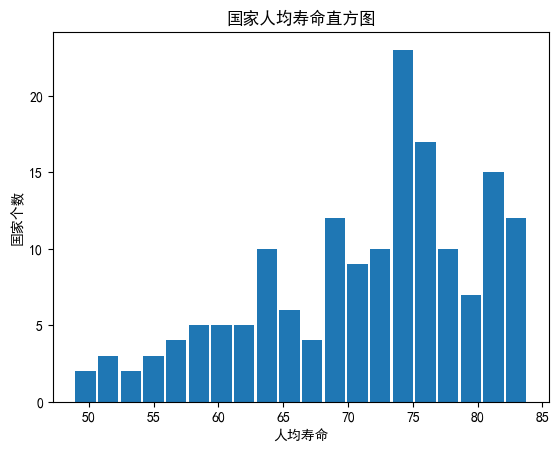

In [13]:
#绘制人均寿命与国家个数的直方图
plt.hist(df.life, bins=20, rwidth=0.9)  # bins 设置区间数，rwidth设置柱子相对宽度
plt.xlabel('人均寿命')
plt.ylabel('国家个数')
plt.title('国家人均寿命直方图')
plt.show()

仿照上面的代码，绘制人均GDP与国家个数的直方图，区间数设为30，柱的相对宽度设为0.9，颜色设为绿色（0.5分）

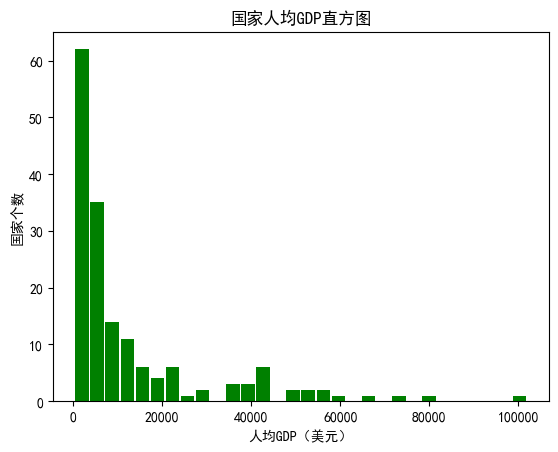

In [14]:
#TODO
plt.hist(df.gdp, bins=30, rwidth=0.9, color='green')
plt.xlabel('人均GDP（美元）')
plt.ylabel('国家个数')
plt.title('国家人均GDP直方图')
plt.show()

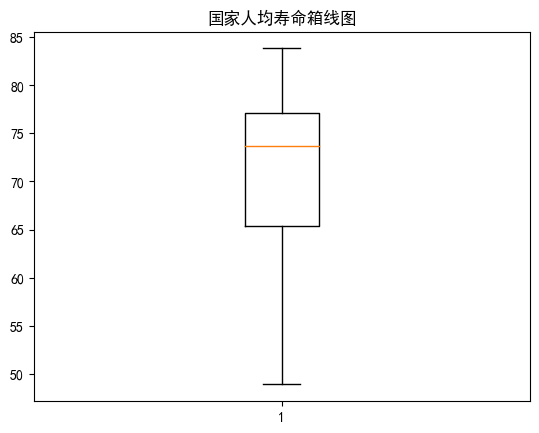

In [15]:
#绘制人均寿命箱线图
plt.boxplot(df.life)
plt.title('国家人均寿命箱线图')
plt.show()

仿照上面的代码，绘制人均GDP的箱线图（0.5分）

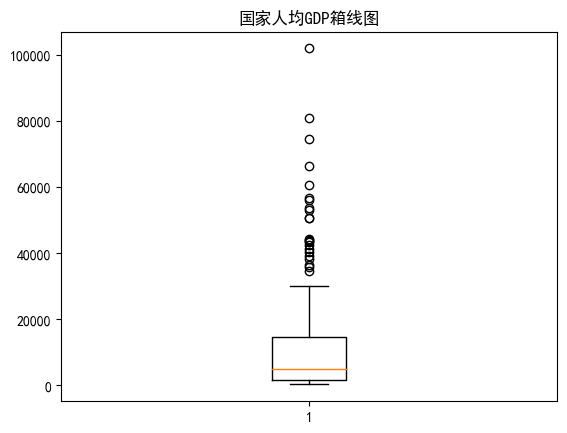

In [16]:
#TODO
plt.boxplot(df.gdp)
plt.title('国家人均GDP箱线图')
plt.show()

画出以人均GDP为横坐标，人均寿命为纵坐标的各国数据散点图（scatter）（0.5分）

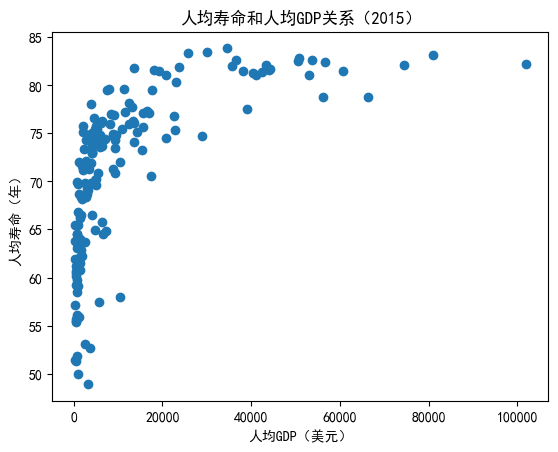

In [17]:
#TODO
plt.scatter(df.gdp, df.life)
plt.xlabel('人均GDP（美元）')
plt.ylabel('人均寿命（年）')
plt.title('人均寿命和人均GDP关系（2015）')
plt.show()

注意到散点图构成一个对数函数的趋势，请使用plt.xscale对横轴进行对数（log）变换（0.5分）

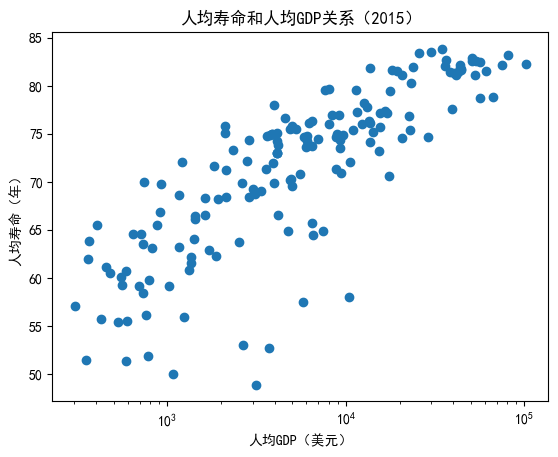

In [18]:
#TODO
plt.scatter(df.gdp, df.life)
plt.xlabel('人均GDP（美元）')
plt.ylabel('人均寿命（年）')
plt.title('人均寿命和人均GDP关系（2015）')
plt.xscale('log')
plt.show()

在此基础上，使点的大小正比于国家的人口数（0.5分）

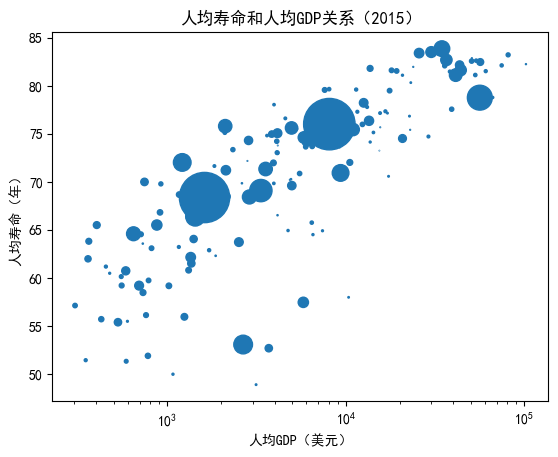

In [19]:
#TODO
size_scale = 1e-6
size = list(df.popu * size_scale)
plt.scatter(df.gdp, df.life, s=size)
plt.xlabel('人均GDP（美元）')
plt.ylabel('人均寿命（年）')
plt.title('人均寿命和人均GDP关系（2015）')
plt.xscale('log')
plt.show()

#### 1.3 TF-IDF （3 + 1.5分）

读懂代码，并补全tf-idf计算的部分

一般来说，$tf-idf$表示为矩阵$W$，其中$W_{i,d}$表示为第i个词在第d个文档中的$tf-idf$值，$tf_{i,d}$被定义为第i个词在第d个文档中出现的频率，$idf_i$表示第i个词在所有文档中的稀有度，其计算公式为$idf_i = log(N/df_i)$（自然对数即可），其中$df_i$表示有多少个文档包含该词，$N$表示文档总数，从该式可以看出，包含该词的文档数目越少，表示该词越稀有，其重要性越高.

最终权值$W_{i,d} = tf_{i,d} \times idf_i$，在本题中，已经计算出每个词的df值（self.vocab），你需要在`get_tfidf()`函数中，对于输入的语料库的句子（文档），计算该句子中每一个词的$tf-idf$值，返回其字典。（这里区分大小写，如果以后大作业涉及到，应该是不需要的）

(1分)

In [20]:
import math

class TfIdf:
    def __init__(self):
        self.num_docs = 0
        self.vocab = {}

    def add_corpus(self, corpus):
        self._merge_corpus(corpus)

        tfidf_list = []
        for sentence in corpus:
            tfidf_list.append(self.get_tfidf(sentence))
        return tfidf_list

    def _merge_corpus(self, corpus):
        """
        统计语料库，输出词表，并统计包含每个词的文档数。
        """
        self.num_docs = len(corpus)
        for sentence in corpus:
            words = sentence.strip().split()
            words = set(words)
            for word in words:
                self.vocab[word] = self.vocab.get(word, 0.0) + 1.0


    def get_tfidf(self, sentence):
        tfidf = {}
        terms = sentence.strip().split()
        terms_set = set(terms)
        num_terms = len(terms)
        for term in terms_set:
            # TODO  计算tf与idf的值
            idf = math.log(self.num_docs / self.vocab[term])
            tf = terms.count(term) / num_terms
            tfidf[term] = tf * idf
        return tfidf

corpus = [
    "What is the weather like today",
    "what is for dinner tonight",
    "this is question worth pondering",
    "it is a beautiful day today"
]

tfidf = TfIdf()
tfidf_values = tfidf.add_corpus(corpus)
for tfidf_value in tfidf_values:
    print(tfidf_value)

{'is': 0.0, 'weather': 0.23104906018664842, 'What': 0.23104906018664842, 'the': 0.23104906018664842, 'like': 0.23104906018664842, 'today': 0.11552453009332421}
{'for': 0.2772588722239781, 'is': 0.0, 'tonight': 0.2772588722239781, 'dinner': 0.2772588722239781, 'what': 0.2772588722239781}
{'is': 0.0, 'this': 0.2772588722239781, 'pondering': 0.2772588722239781, 'question': 0.2772588722239781, 'worth': 0.2772588722239781}
{'is': 0.0, 'beautiful': 0.23104906018664842, 'it': 0.23104906018664842, 'day': 0.23104906018664842, 'a': 0.23104906018664842, 'today': 0.11552453009332421}


接下来对实际的古诗数据求TF-IDF值。

In [21]:
data=pd.read_csv('./word_split.csv')
data

,ID,Poem_id,words
0,1,4371,餞 唐 永昌
1,2,4371,沈 佺 期
2,3,4371,洛陽 舊有 神明 宰
3,4,4371,輦轂 由來 天地 中
4,5,4371,餘 邑 政成 何足 貴
...,...,...,...
1796,1797,6651,韋 丹
1797,1798,6651,王事 紛紛 無 暇日
1798,1799,6651,浮生 冉冉 祗 如雲
1799,1800,6651,已 為 平 子 歸 休 計


请你使用`groupby`和`apply`等方法，生成data_new，要求data_new的每一行是一首完整的古诗分词,注意：words列除了空格外不能有任何其他非中文符号。（1分）

In [22]:
#TODO 
data_new = pd.DataFrame(data.set_index('Poem_id').loc[:, ['words']].groupby('Poem_id', as_index=True).apply(lambda x: ' '.join(i[0] for i in x.values)), columns=['words'])
data_new

,words
Poem_id,
4371,餞 唐 永昌 沈 佺 期 洛陽 舊有 神明 宰 輦轂 由來 天地 中 餘 邑 政成 何足 貴...
4373,邙 山 沈 佺 期 北邙 山上 列 墳 塋 萬古 千秋 對 洛城 城中 日夕 歌鐘 起 山上...
4394,同 燕 公 汎 洞庭 尹 懋 風光 淅淅 草中 飄 日 綵 熒熒 水上 颻 幸 奏 瀟湘 雲...
4403,正 朝 上 左 相 張 燕 公 楊 重 玄 歲 去 愁 終 在 春還 命 不來 長吁 問 丞...
4408,巫山 張 循 之 流 景 一何 速 年華 不可 追 解佩 安 所贈 怨咽 空 自悲
...,...
6582,春行 寄 興 李 華 宜陽 城下 草 萋萋 澗水 東流 復 向西 芳樹 無人 花 自落 春山...
6625,春日 歸思 王 翰 楊柳 青青 杏 髮 花 年光 誤 客 轉 思家 不知 湖 上 菱歌 女 ...
6626,觀 蠻 童 為 伎 之 作 王 翰 長 裙 錦帶 還 留客 廣 額 青蛾 亦 效 嚬 共惜 ...


打印计算出的每首诗中每个词的TF-IDF值（1 + 1.5 分）
- （1）使用TFIdf类，仿照前问打印出相应的字典。（1分）
- （2）（附加题）对data仅使用dataframe的方法，生成包含TF-IDF的dateframe并打印（1.5分）

In [23]:
#TODO （1）
tfidf1 = TfIdf()
tfidf_values = tfidf1.add_corpus(data_new['words'].values)
for tfidf_value in tfidf_values:
    print(tfidf_value)

{'貴': 0.22815129898624803, '中': 0.09939626599152002, '何足': 0.22815129898624803, '餘': 0.1449736373190546, '永昌': 0.18420680743952367, '由來': 0.18420680743952367, '期': 0.16377378248888402, '唐': 0.16377378248888402, '政成': 0.22815129898624803, '沈': 0.16377378248888402, '餞': 0.18420680743952367, '四方': 0.20042541176385023, '宰': 0.20042541176385023, '君': 0.11724775009665679, '舊有': 0.22815129898624803, '天地': 0.22815129898624803, '取': 0.18420680743952367, '佺': 0.20042541176385023, '輦轂': 0.22815129898624803, '神明': 0.20042541176385023, '同': 0.1225890058016377, '則': 0.20042541176385023, '因': 0.128755032994728, '邑': 0.20042541176385023, '洛陽': 0.13604789526648622}
{'起': 0.15938899533272646, '邙': 0.25926283975710007, '聲': 0.15938899533272646, '墳': 0.25926283975710007, '期': 0.18610657101009548, '唯聞': 0.22775614973164798, '列': 0.22775614973164798, '沈': 0.18610657101009548, '對': 0.1647427696807439, '山': 0.10779899838549988, '塋': 0.25926283975710007, '北邙': 0.25926283975710007, '佺': 0.22775614973164798, '城中

In [24]:
#TODO 附加题
# 输出形式只是参考，可以和输出形式不一致,包含TF-IDF即可
N = len(set(data.Poem_id)) * 1.0
dt = pd.DataFrame(data.groupby('Poem_id').apply(lambda x: (' '.join(x['words'].values).split(' '))), columns=['words']).explode('words').reset_index()
dt = pd.merge(dt, pd.DataFrame(1.0/dt.value_counts('Poem_id'), columns=['TF']), on='Poem_id')
dt = pd.merge(dt, pd.DataFrame(np.log(N/dt.value_counts('words')), columns=['IDF']), on='words', how='left')
dt['TF-IDF'] = dt['TF'] * dt['IDF']
dt

,Poem_id,words,TF,IDF,TF-IDF
0,4371,餞,0.040000,4.605170,0.184207
1,4371,唐,0.040000,4.094345,0.163774
2,4371,永昌,0.040000,4.605170,0.184207
3,4371,沈,0.040000,4.094345,0.163774
4,4371,佺,0.040000,5.010635,0.200425
...,...,...,...,...,...
6936,6651,五,0.033333,3.064725,0.102158
6937,6651,老,0.033333,3.506558,0.116885
6938,6651,巖前,0.033333,5.703782,0.190126
6939,6651,必,0.033333,5.010635,0.167021


#### 1.4 协同过滤（4分）

在ratings.csv数据集中，记录了不同用户对不同电影的评分

In [25]:
import pandas as pd
import numpy as np

'''
userId : 用户 ID
movieId : 用户看过的电影 ID
rating : 用户对所看电影的评分
timestap : 用户看电影的时间戳
'''
data=pd.read_csv('ratings.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


下面给出基于用户的协同过滤推荐算法，阅读指导文档并读懂代码

In [26]:
import random
import operator


class UserBasedCF:
    def __init__(self):
        self.N = {}  # number of items user interacted, N[u] = the number of items user u interacted
        self.W = {}  # similarity of user u and user v

        self.train = {} # train = { user : [[item1, rating1], [item2, rating2], …], …… }
        self.item_users = {}    # item_users = { item : [user1, user2, …]， …… }
        # recommend n items from the k most similar users
        self.k = 30
        self.n = 10


    def get_data(self, file_path):
        """
        @description: load data from dataset
        @file_path: path of dataset
        """
        print('start loading data from ', file_path)
        with open(file_path, 'r') as f:
            for i, line in enumerate(f, 0):
                if i != 0:  # remove the title of the first line
                    line = line.strip('\n')
                    user, item, rating, timestamp = line.split(',')
                    self.train.setdefault(user, [])
                    self.train[user].append([item, rating])

                    self.item_users.setdefault(item, [])
                    self.item_users[item].append(user) 


    def similarity(self):
        """
        @description: calculate similarity between user u and user v
        """
        print('start caculating similarity matrix ...')
        for item, users in self.item_users.items():
            for u in users:
                self.N.setdefault(u, 0)
                self.N[u] += 1
                for v in users:
                    if u != v:
                        self.W.setdefault(u, {})
                        self.W[u].setdefault(v, 0)
                        self.W[u][v] += 1   # number of items which both user u and user v have interacted
        for u, user_cnts in self.W.items():
            for v, cnt in user_cnts.items():
                self.W[u][v] = self.W[u][v] / (self.N[u] * self.N[v]) ** 0.5    # similarity between user u and user v
 

    def recommendation(self, user):
        """
        @description: recommend items for user
        @param user : the user who is recommended, we call this user u
        @return : items recommended for user u
        """
        print('start recommending items for user whose userId is ', user)
        watched = [i[0] for i in self.train[user]]  # items that user have interacted
        rank = {}
        for v, similar in sorted(self.W[user].items(), key=operator.itemgetter(1), reverse=True)[0:self.k]: # order user v by similarity between user v and user u
            for item_rating in self.train[v]:   # items user v have interacted
                if item_rating[0] not in watched:   # item user hvae not interacted
                    rank.setdefault(item_rating[0], 0.)
                    rank[item_rating[0]] += similar * float(item_rating[1])
        return sorted(rank.items(), key=operator.itemgetter(1), reverse=True)[0:self.n]
        

if __name__ == "__main__":    
    file_path = "ratings.csv"
    userBasedCF = UserBasedCF()
    userBasedCF.get_data(file_path)
    userBasedCF.similarity()
    rec = userBasedCF.recommendation('603')
    print(rec)


start loading data from  ratings.csv
start caculating similarity matrix ...
start recommending items for user whose userId is  603
[('1136', 36.304264406802005), ('50', 34.25822996067522), ('318', 32.43366674458447), ('750', 30.261736317153563), ('480', 30.043337246144567), ('589', 29.98409254518969), ('1968', 29.049136001602523), ('1259', 28.935451711534252), ('1610', 28.48379202144895), ('1204', 27.320380811511363)]


下面给出基于物品（movie）的协同过滤推荐算法，阅读指导文档，补全代码（4分）

In [1]:
import random
import operator

class ItemBasedCF:
    def __init__(self):
        self.N = {} # number of item user have interacted
        self.W = {} # similarity matrix to store similarity of item i and item j
        self.train = {}
        # recommend n items from the k most similar to the items user have interacted 
        self.k = 30
        self.n = 10

    
    def get_data(self, file_path):
        """
        @description: load data from file
        @param file_path: path of file
        """
        print('start loading data from ', file_path)
        #TODO
        with open(file_path, "r") as f:
            for i, line in enumerate(f, 0):
                if i != 0:  # remove the title of the first line
                    line = line.strip('\n')
                    user, item, rating, timestamp = line.split(',')
                    
                    self.train.setdefault(user, [])
                    self.train[user].append([item, rating])
                

    def similarity(self):
        """
        @description: caculate similarity between item i and item j
        """
        print('start caculating similarity matrix ...')
        #TODO
        for user, item_rate in self.train.items():
            for i, rate in item_rate:
                self.N.setdefault(i, 0)
                self.N[i] += 1
                for j, _ in item_rate:
                    if j != i:
                        self.W.setdefault(i, {})
                        self.W[i].setdefault(j, 0)
                        self.W[i][j] += 1
        for i, i_data in self.W.items():
            for j, j_data in i_data.items():
                self.W[i][j] = self.W[i][j] / (self.N[i] * self.N[j]) ** 0.5


    def recommendation(self, user):
        """
        @description: recommend n item for user
        @param user: recommended user
        @return items recommended for user
        """
        print('start recommending items for user whose userId is ', user)
        #TODO
        watched_rate = self.train[user]
        watched = [i[0] for i in watched_rate]
        rank = {}
        for i, rating in watched_rate:
            for j, similar in sorted(self.W[i].items(), key=lambda x: x[1], reverse=True)[:self.k]:
                if j not in watched:
                    rank.setdefault(j, 0)
                    rank[j] += similar * float(rating)
        return sorted(rank.items(), key=lambda x: x[1], reverse=True)[0:self.n]



if __name__ == "__main__":
    file_path = "ratings.csv"
    itemBasedCF = ItemBasedCF()
    itemBasedCF.get_data(file_path)
    itemBasedCF.similarity()
    rec = itemBasedCF.recommendation('206')
    
    print(rec)


start loading data from  ratings.csv
start caculating similarity matrix ...
start recommending items for user whose userId is  206
[('788', 21.574863446830772), ('1210', 16.860882239035483), ('260', 15.689864309167934), ('628', 13.291597648535504), ('296', 12.619376933540945), ('6', 12.39076566466791), ('480', 11.158199091592671), ('708', 10.975267112425945), ('457', 10.665113453095415), ('1240', 10.63559634289679)]
